<a href="https://colab.research.google.com/github/MaidenTaief/MUSIC-REC/blob/main/hierarchy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

file_path = '/content/exploded_data.csv'
data_check = pd.read_csv(file_path)
data_check.head()

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,show tunes,"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5.0,1.0,9.0
1,Unknown,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5.0,1.0,26.0
2,Unknown,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0.0,1.0,7.0
3,Unknown,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0.0,1.0,27.0
4,Unknown,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5.0,1.0,7.0


In [3]:
#check for missing values
print(data_check.isnull().sum())
#check for duplicates
duplicates = data_check.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
# check missing rows
missing_rows = data_check.isnull().sum()
print(f"Number of missing rows: {missing_rows.sum()}")

genres              0
artists             0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          1
key                 1
mode                1
count               1
dtype: int64
Number of duplicate rows: 0
Number of missing rows: 4


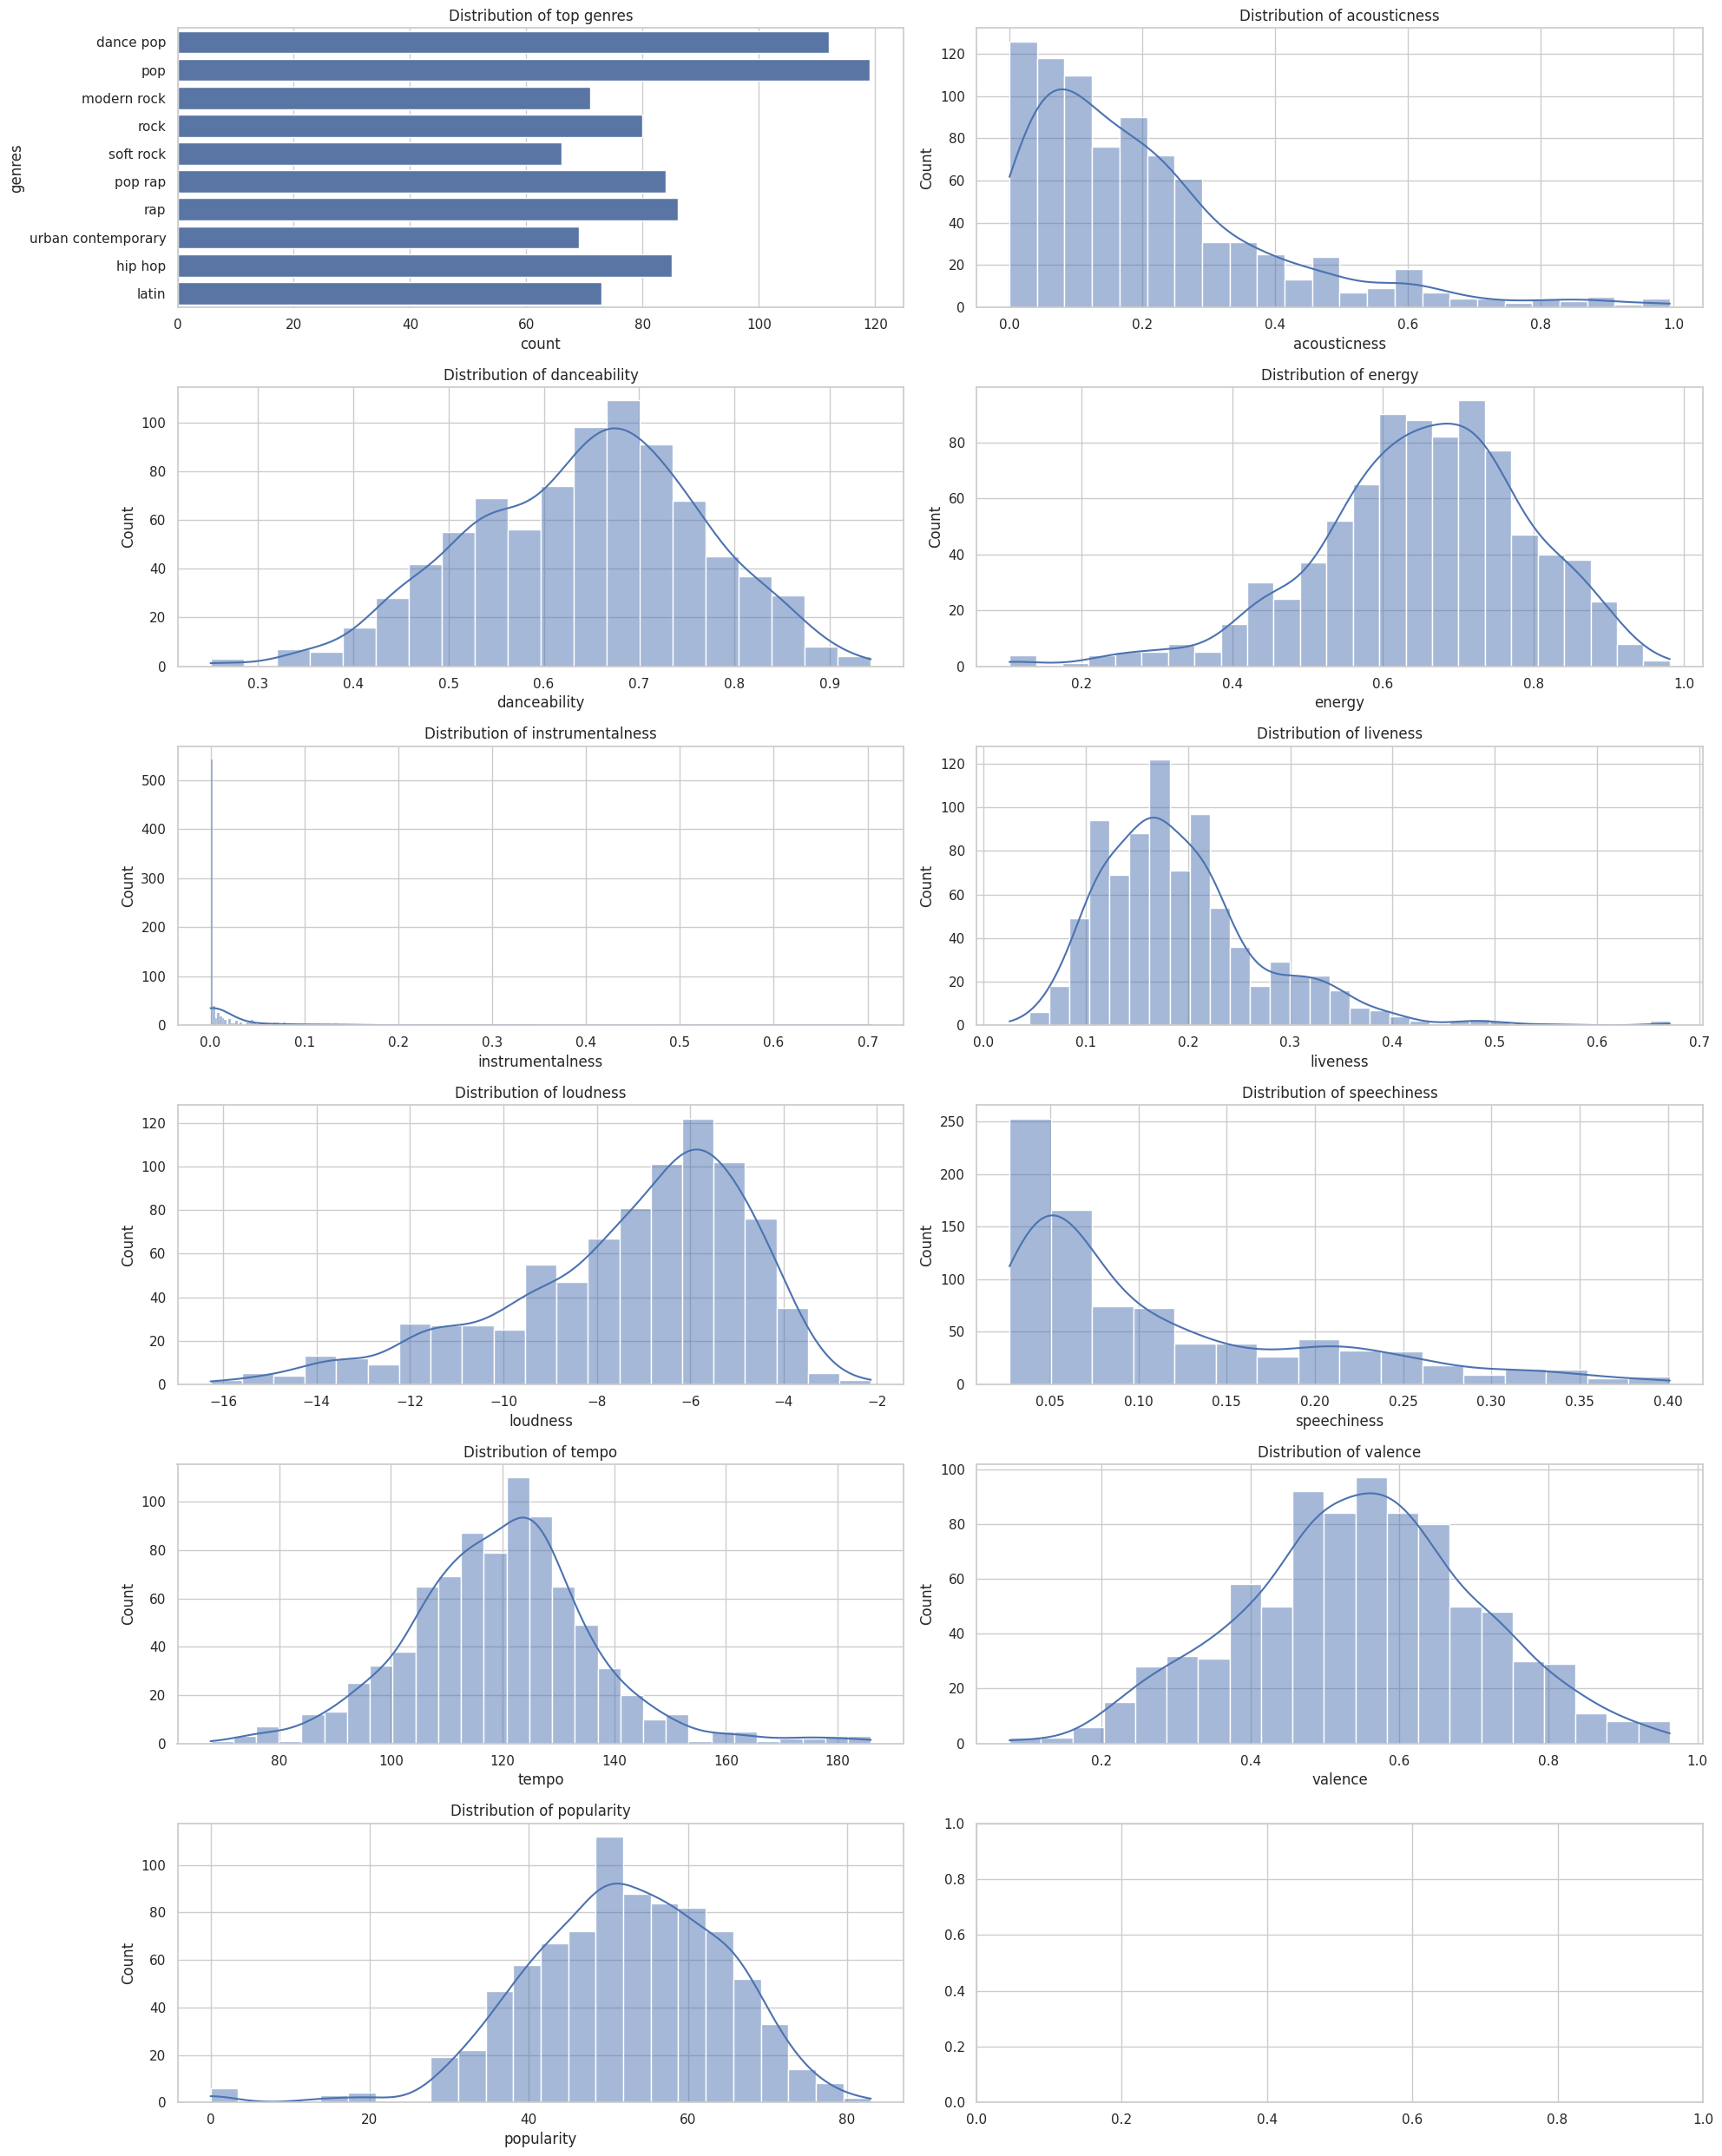

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Setting visual style for plots
sns.set(style="whitegrid")

# Exclude 'unknown' genre
data_check = data_check[data_check['genres'] != 'Unknown']

# Choose the top N genres to display, after excluding 'unknown'
top_n = 10  # Change this to display more or fewer genres
top_genres = data_check['genres'].value_counts().head(top_n).index

# Filter the dataframe to include only the top N genres
filtered_data = data_check[data_check['genres'].isin(top_genres)]

# List of features to plot, excluding 'genres' since we're handling it separately
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

# Plotting distributions, with an additional plot for 'genres'
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(20, 25))
# Plot for 'genres'
sns.countplot(data=filtered_data, y='genres', ax=axes[0, 0])
axes[0, 0].set_title('Distribution of top genres')

# Plotting the rest of the features
for i, feature in enumerate(features):
    sns.histplot(data=filtered_data[feature], ax=axes[(i+1)//2, (i+1)%2], kde=True)
    axes[(i+1)//2, (i+1)%2].set_title(f'Distribution of {feature}')
plt.tight_layout()

plt.show()


In [5]:
# Descriptive statistics
descriptive_stats = data_check.describe()
print(descriptive_stats)

       acousticness  danceability   duration_ms        energy  \
count  10965.000000  10965.000000  1.096500e+04  10965.000000   
mean       0.365137      0.563718  2.459601e+05      0.571106   
std        0.324407      0.158648  8.317581e+04      0.233300   
min        0.000000      0.000000  3.597300e+04      0.000020   
25%        0.074822      0.464000  1.966796e+05      0.420593   
50%        0.259967      0.569200  2.334374e+05      0.600600   
75%        0.627945      0.678000  2.749482e+05      0.745000   
max        0.996000      0.980000  2.043024e+06      0.998500   

       instrumentalness      liveness      loudness   speechiness  \
count      10965.000000  10965.000000  10965.000000  10965.000000   
mean           0.145754      0.190259     -9.849515      0.085937   
std            0.262135      0.111006      5.272595      0.085361   
min            0.000000      0.000000    -47.190000      0.000000   
25%            0.000015      0.115867    -12.050286      0.039715   


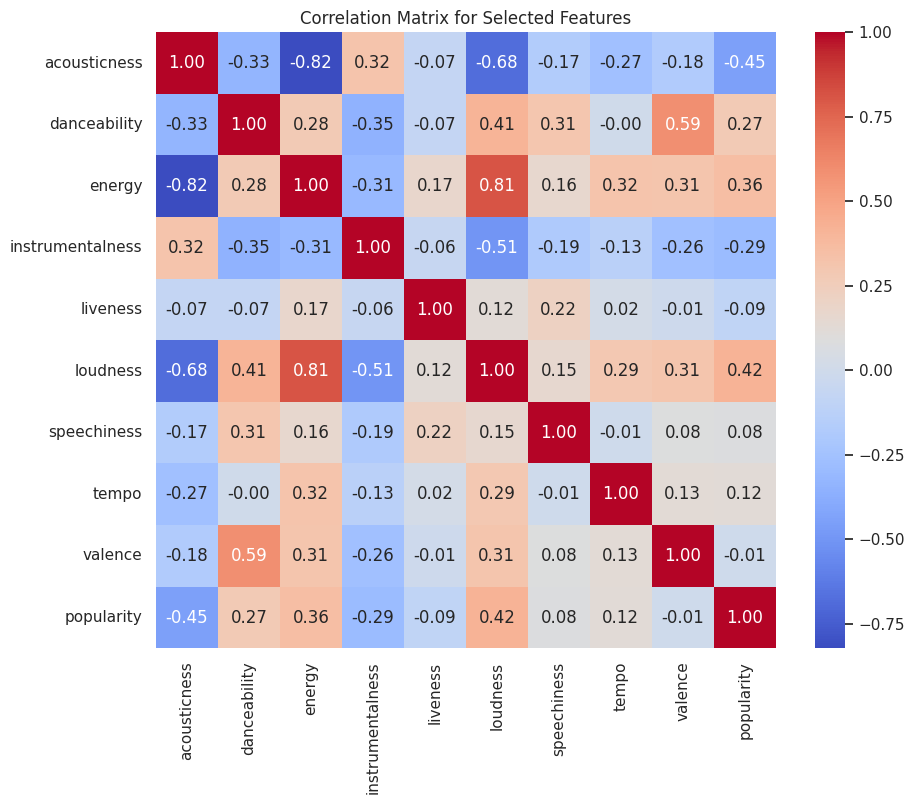

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'popularity']

# Select only the specified features from the DataFrame
features_data = data_check[features]

# Compute the correlation matrix
correlation_matrix = features_data.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Selected Features')
plt.show()


In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np


# One-hot encode the 'genres' column
one_hot = OneHotEncoder()
genres_encoded = one_hot.fit_transform(data_check[['genres']]).toarray()
genre_features = one_hot.get_feature_names_out(['genres'])

# Standardizing the continuous features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_check[features])

# PCA on the continuous features
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

# Combine PCA-reduced features with one-hot encoded genres
X_combined = np.hstack([X_pca, genres_encoded])

print("PCA Components (Loadings):")
print(pca.components_)

print("\nExplained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Now, X_combined contains both PCA-reduced continuous features and one-hot encoded genres


PCA Components (Loadings):
[[ 0.42929997 -0.31427425 -0.44743596  0.31050546 -0.06241616 -0.46164082
  -0.16086837 -0.1875642  -0.24902619 -0.28326599]
 [ 0.25286532  0.55835188 -0.24938066 -0.16030419 -0.11629783 -0.12433008
   0.28566837 -0.34377869  0.52313597 -0.18430833]
 [ 0.01645201 -0.11619017  0.06781076  0.00263143  0.77701343 -0.00440984
   0.53696586 -0.07954391 -0.11742924 -0.26344914]
 [-0.07411879  0.0507862  -0.12569504 -0.14550863 -0.14266708 -0.02868128
   0.32037993 -0.53300873 -0.49210401  0.55215096]
 [ 0.21325606 -0.016174   -0.27028187 -0.30474291 -0.21235659 -0.13630243
   0.45652619  0.696192   -0.14165879  0.10723514]
 [-0.22874136  0.15940416  0.16994756  0.78777499 -0.26430963 -0.12247434
   0.41940327  0.10812527  0.01826548  0.00356949]
 [-0.19392414 -0.24624354  0.19866655 -0.27540288 -0.4755177   0.16152605
   0.23645637 -0.19751292 -0.18373528 -0.63683046]
 [-0.22752579  0.6612969  -0.18648386  0.00149341  0.11455013  0.00834665
  -0.23908583  0.1440857

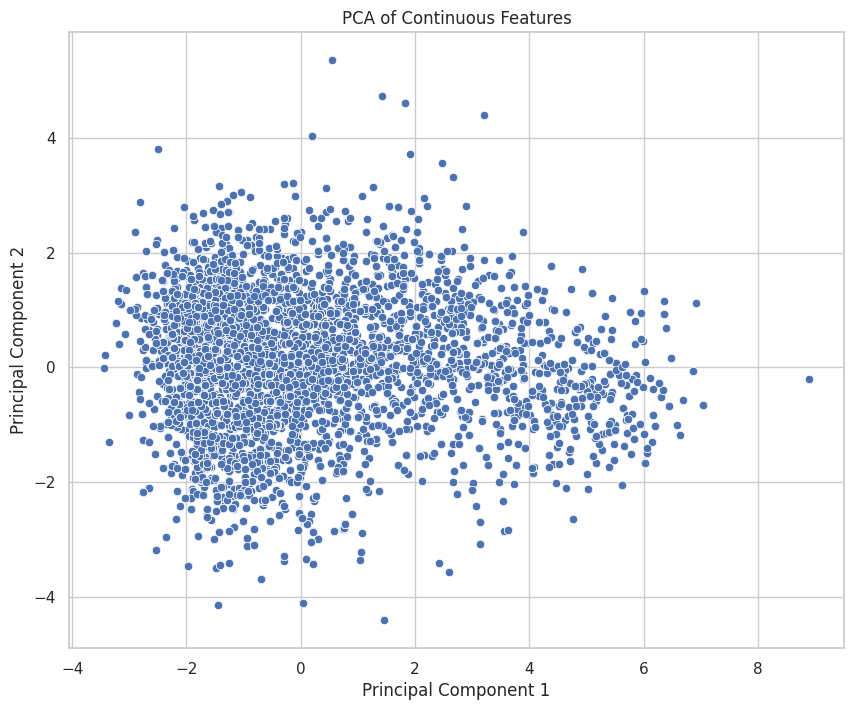

In [10]:
import seaborn as sns

# Convert X_pca to DataFrame for easier plotting with Seaborn
pca_df = pd.DataFrame(X_pca, columns=[f'Principal Component {i+1}' for i in range(X_pca.shape[1])])

# Use Seaborn's scatterplot for the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x='Principal Component 1', y='Principal Component 2')
plt.title('PCA of Continuous Features')
plt.show()


Number of clusters: 2, Silhouette Score: 0.27428379246766654
Number of clusters: 3, Silhouette Score: 0.143830238434562
Number of clusters: 4, Silhouette Score: 0.14595767036231175
Number of clusters: 5, Silhouette Score: 0.143960531019335
Number of clusters: 6, Silhouette Score: 0.12921847979857798
Number of clusters: 7, Silhouette Score: 0.13714582807134523
Number of clusters: 8, Silhouette Score: 0.14196487575152555
Number of clusters: 9, Silhouette Score: 0.12242102434627795
Number of clusters: 10, Silhouette Score: 0.11828795407843137
Number of clusters: 11, Silhouette Score: 0.11945380193924789


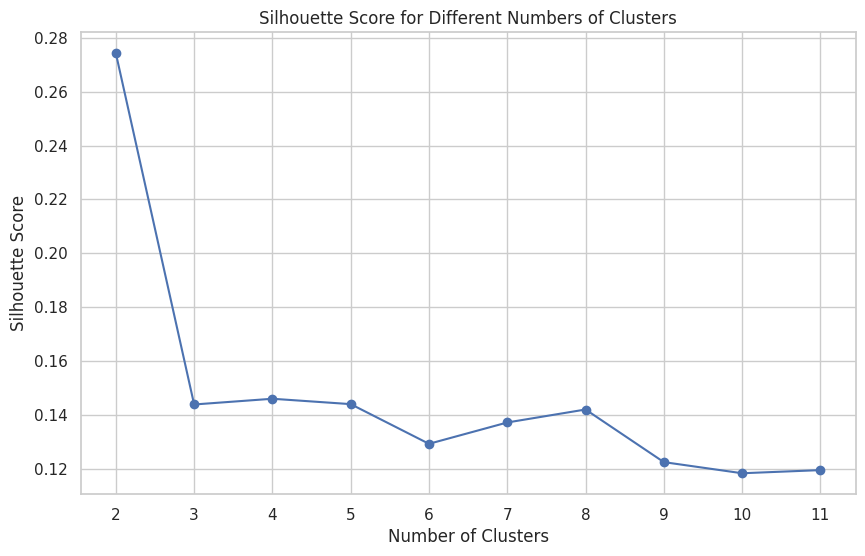

In [11]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Define the range of clusters to try
cluster_range = range(2, 12)

# Placeholder for silhouette scores
silhouette_scores = []

# Fit KMeans and calculate silhouette scores
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    clusters = kmeans.fit_predict(X_combined)

    score = silhouette_score(X_combined, clusters)
    silhouette_scores.append(score)
    print(f"Number of clusters: {n_clusters}, Silhouette Score: {score}")

# Plotting the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xticks(cluster_range)
plt.show()



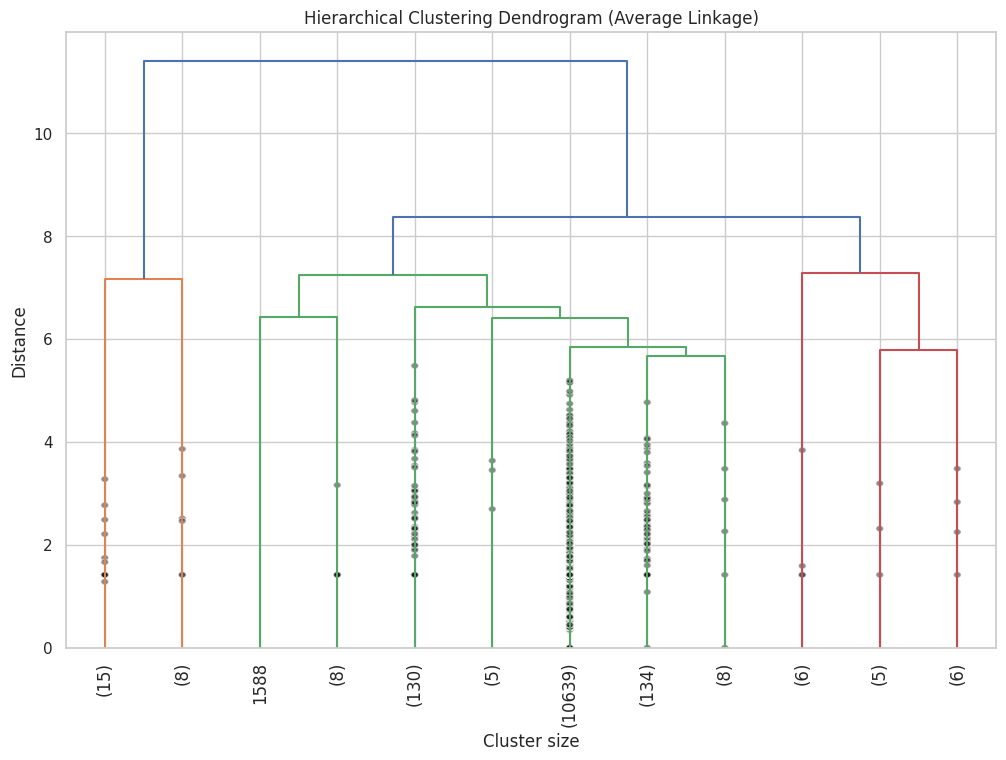

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Compute the linkage matrix using average linkage
Z = linkage(X_combined, method='average', metric='euclidean')

# Plot the dendrogram, trimming to the last p merged clusters
plt.figure(figsize=(12, 8))  # Make the figure larger
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last 12 merged clusters
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12.,  # font size for the x axis labels
    show_contracted=True,  # to get a better idea of the distribution
)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()


Number of Clusters: 2, Silhouette Score: 0.6190968248070716
Number of Clusters: 3, Silhouette Score: 0.4749204888070668
Number of Clusters: 4, Silhouette Score: 0.45447170729080905
Number of Clusters: 5, Silhouette Score: 0.37865444273750026
Number of Clusters: 6, Silhouette Score: 0.3783861079140367
Number of Clusters: 7, Silhouette Score: 0.33164502307870114
Number of Clusters: 8, Silhouette Score: 0.32688794362850915
Number of Clusters: 9, Silhouette Score: 0.2849320295673892
Number of Clusters: 10, Silhouette Score: 0.22750390168374982
Number of Clusters: 11, Silhouette Score: 0.21910233581755426


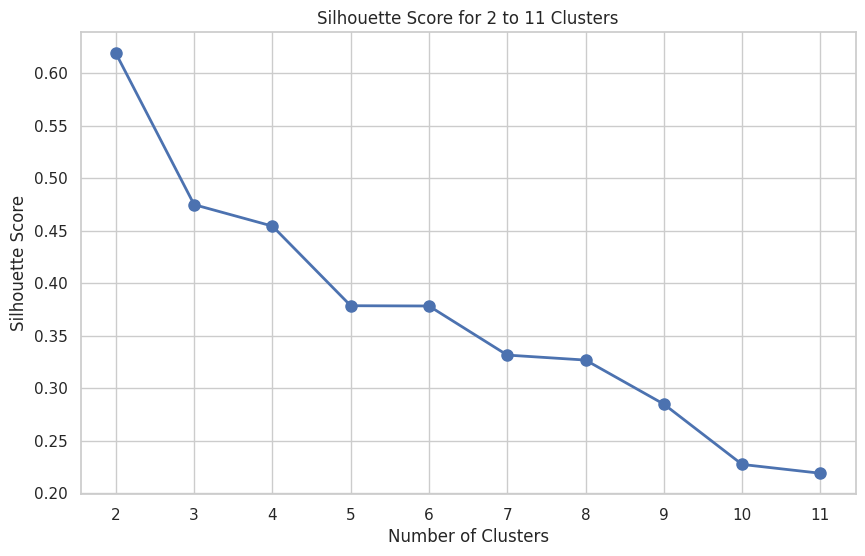

In [17]:
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import fcluster
import numpy as np
import matplotlib.pyplot as plt

# Define the range of clusters you are interested in
cluster_range = range(2, 12)

# Placeholder for silhouette scores
silhouette_scores = []

for n_clusters in cluster_range:
    # Cut the dendrogram at the specified number of clusters
    clusters = fcluster(Z, n_clusters, criterion='maxclust')

    # Calculate the silhouette score for this clustering
    score = silhouette_score(X_combined, clusters)
    silhouette_scores.append(score)
    print(f"Number of Clusters: {n_clusters}, Silhouette Score: {score}")

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, 'o-', linewidth=2, markersize=8)
plt.title('Silhouette Score for 2 to 11 Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()


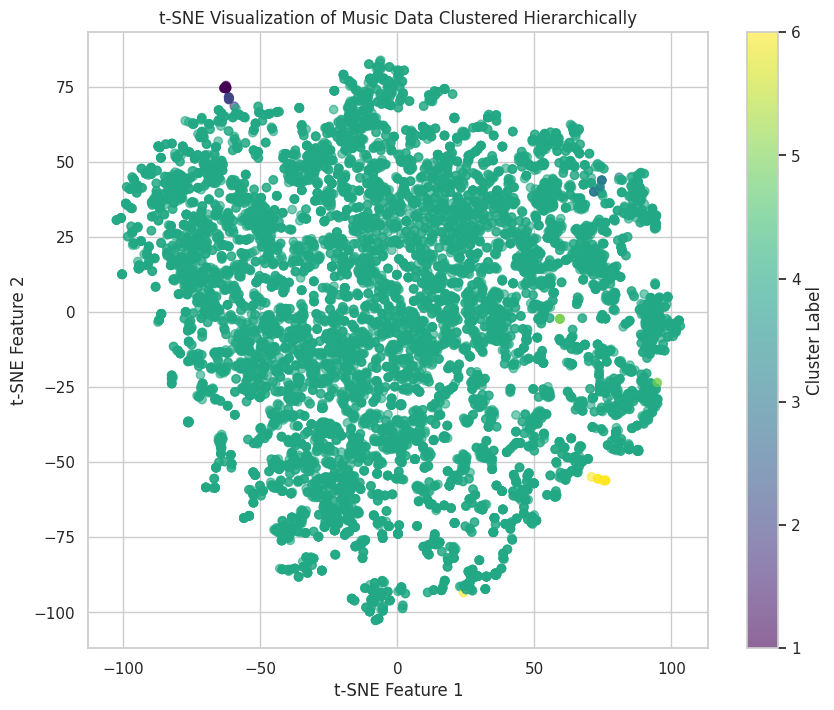

         acousticness  danceability    energy  instrumentalness  liveness  \
cluster                                                                     
1            0.834401      0.533300  0.691255          0.000086  0.844570   
2            0.733375      0.650833  0.139419          0.000414  0.211992   
3            0.842556      0.580556  0.500956          0.349944  0.561667   
4            0.364047      0.564481  0.571834          0.145094  0.188747   
5            0.309667      0.000000  0.003369          0.328833  0.044333   
6            0.178764      0.078227  0.365932          0.838530  0.558030   

          loudness  speechiness       tempo   valence  popularity  
cluster                                                            
1       -13.153636     0.897248   98.481405  0.340178   31.558704  
2       -20.460187     0.826229   90.511437  0.384875    7.770833  
3       -13.611000     0.251078  173.407778  0.913444    3.111111  
4        -9.815333     0.084219  119.155674

In [18]:
from scipy.cluster.hierarchy import fcluster
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Decide on the number of clusters based on silhouette analysis
optimal_num_clusters = 6
clusters = fcluster(Z, optimal_num_clusters, criterion='maxclust')

# Perform t-SNE reduction for visualization
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X_combined)

# Visualize the 2D t-SNE reduction colored by hierarchical clusters
plt.figure(figsize=(10, 8))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.6)
plt.title('t-SNE Visualization of Music Data Clustered Hierarchically')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Analyze the cluster profiles
# Add the cluster labels to your original DataFrame
data_check['cluster'] = clusters
# Calculate the mean of features for each cluster
cluster_profile = data_check.groupby('cluster')[features].mean()
print(cluster_profile)
